<a href="https://colab.research.google.com/github/bingsen-wang/Math/blob/main/TaylorSeries_expx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Taylor Series for $e^ x$</h1></b>

> Add blockquote



Dr. Bingsen Wang

11/5/2024
</center>

#Python Code


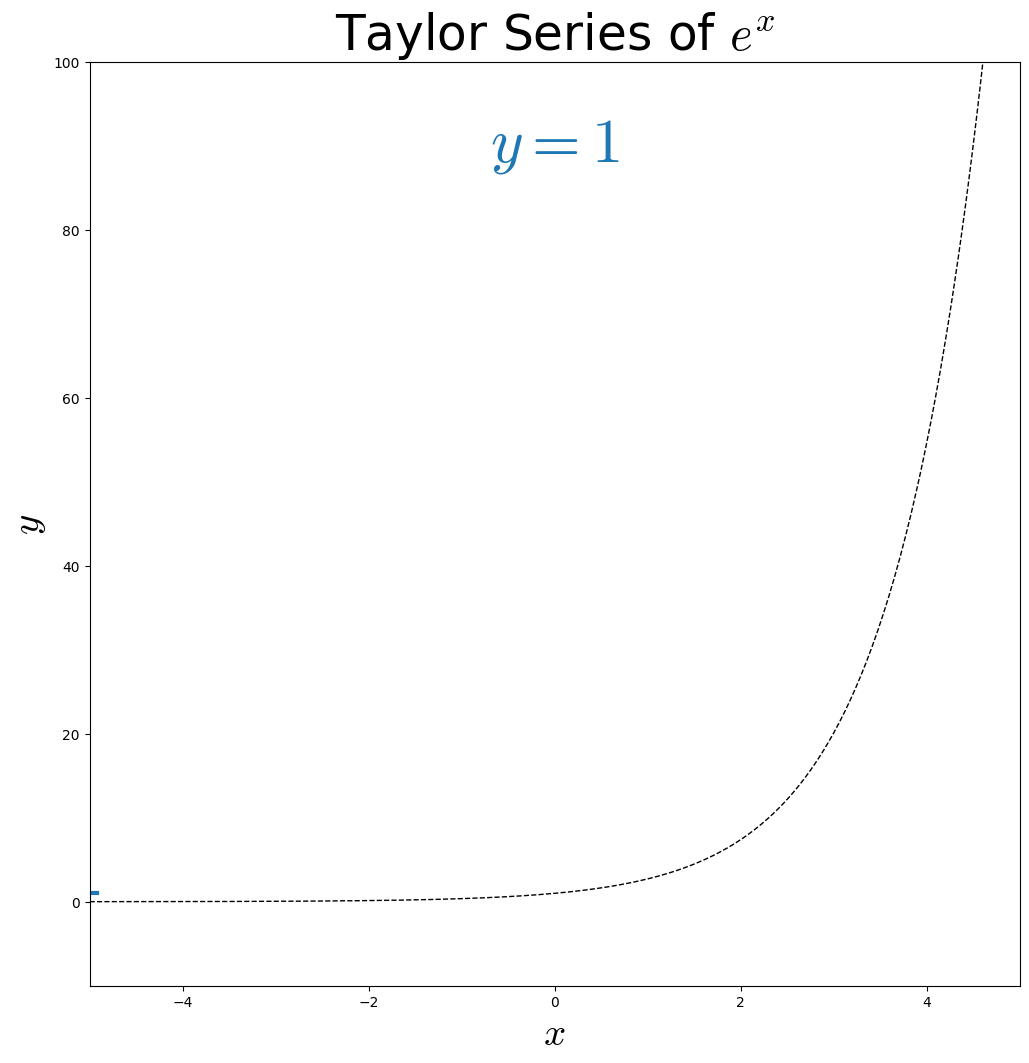

In [ ]:
from numpy import linspace,cos,sin,arccos,pi,abs,exp,sum
from math import factorial
from matplotlib import animation,pyplot,cm
pyplot.rcParams.update({'font.family':"sans serif",'animation.html':'jshtml',
                     'mathtext.fontset':'cm'})
def ts_exp(x,n):
  y=0
  for i in range(n):
    y += x**i/factorial(i)
  return y

# def ts_sin(x,n):
#   return sum([x**(2*i+1)/factorial(2*i+1) for i in range(n)])

def str_yn(x,k):
  if k==0:
    yn = '1'
  elif k==1:
    yn='1+x'
  else:
    yn = str_yn(x,k-1)+r'+\frac{x^{'+str(k)+'}}{'+str(k)+'!}'
  return yn

Nf=11
clst = list(cm.tab10.colors) #colors of lines
xn,xm=-5,5
x = linspace(xn,xm,500)
Npf = len(x)//5
tsn_lst=[(ts_exp(x,i)) for i in range(1,Nf+1)]
fig = pyplot.figure(figsize=([12,12]))
ax = fig.add_subplot(111,xlim=(xn,xm),ylim=(-10,100))
ax.set_title('Taylor Series of $e^x$',size=35)
ax.set_xlabel('$x$',size=28),ax.set_ylabel('$y$',size=28)
ax.plot(x,exp(x),'--k',lw=1)
txt = ax.text(0,90,'',size=25,ha='center',va='center')
lines=ax.plot([],[],lw=3)[0]
def animate(ii):
  # ii=9
  i=ii%Npf
  k=ii//Npf
  if i==0:
    txt.set_text("$y="+str_yn(x,k)+'$')
    txt.set_color(clst[k%len(clst)])
    txt.set_fontsize(45-k/Nf*18)
  lines.set_data(x[:(i+1)*5],tsn_lst[k][:(i+1)*5])
  lines.set_color(clst[k%len(clst)])
  return
anim = animation.FuncAnimation(fig, animate, frames=Nf*Npf, interval=50)
anim.save("TaylorSeries_expx.mp4",writer=animation.FFMpegWriter(fps=50),dpi=200)